In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:

df = pd.read_csv("D:\\Descargas\\bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


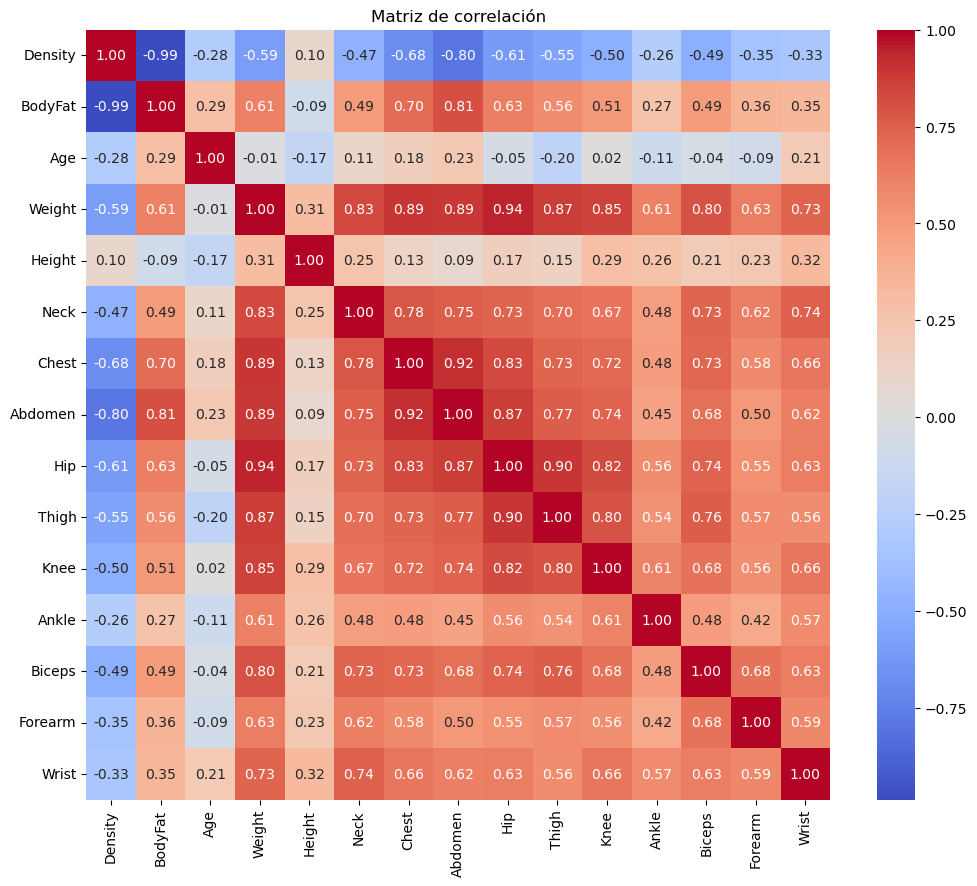

In [ ]:
df.info()
df.describe()
#ahora reviso correlaciones para comenzar con feature selection más adelante
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


In [ ]:
#seleccionar las variables más correlacionadas con BOdyFat.
features = ['Age', 'Weight', 'Height', 'Abdomen', 'Wrist']
X = df[features]
y = df['BodyFat']

In [ ]:
#Escalo los datos con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Divido en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#Entreno tres modelos: Regresión Lineal, Árbol de Decisión y Random Forest
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "R2": r2}

Modelo: Linear Regression
  MAE: 3.3502
  MSE: 19.4142
  R2: 0.5827

Modelo: Decision Tree
  MAE: 5.1157
  MSE: 37.5116
  R2: 0.1936

Modelo: Random Forest
  MAE: 3.3213
  MSE: 16.2271
  R2: 0.6512



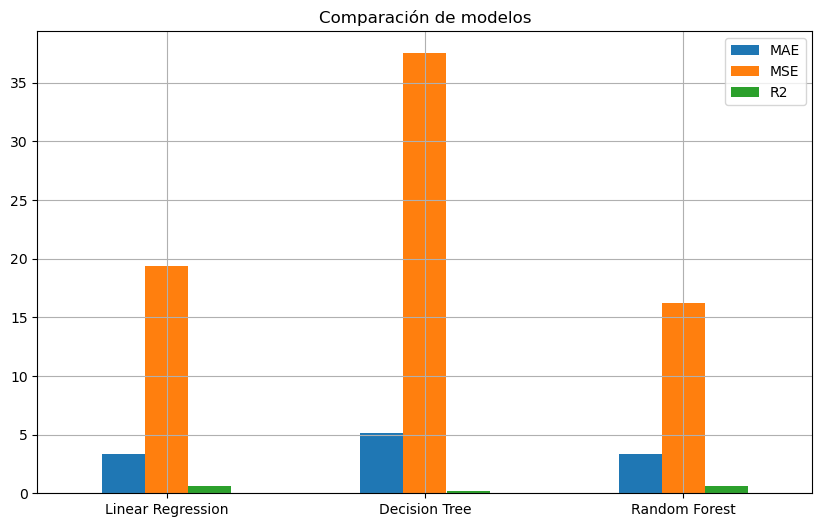

In [ ]:
#Cumplo con "Visualización de resultados" y "Métricas"
for name, metrics in results.items():
    print(f"Modelo: {name}")
    for m_name, value in metrics.items():
        print(f"  {m_name}: {value:.4f}")
    print()

#Comparo los resultados visualmente
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(10,6), title='Comparación de modelos')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [ ]:
#Aquí verifico si el modelo Random Forest está sobreajustando.

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
#Predicciones
train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)

#Métricas en entrenamiento
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print(f"R² en entrenamiento: {train_r2:.4f}")
print(f"R² en prueba: {test_r2:.4f}")



R² en entrenamiento: 0.9554
R² en prueba: 0.6512


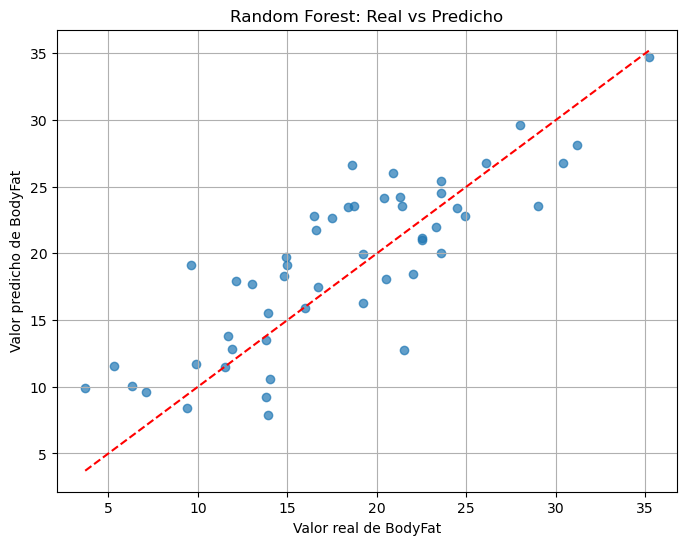

In [ ]:
#Aquí visualizo los valores reales vs los predichos por el mejor modelo (Random Forest)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_preds, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valor real de BodyFat')
plt.ylabel('Valor predicho de BodyFat')
plt.title('Random Forest: Real vs Predicho')
plt.grid(True)
plt.show()